In [20]:
# Load packages
import importlib
import scripts.vrae
importlib.reload(scripts.vrae)


import sys
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns



# Load local scripts
# Add scripts folder to sys.path so scripts can be imported
sys.path.insert(1, 'scripts')
from scripts.data_functions import load_ecg_data,addDamicAdmissionData, load_selected_ecg
from scripts.visualisation import plot_ecgs_per_location, plot_ecgs_at_ICU, plot_ecgs_per_year

from scripts.vrae import VRAE

from scripts.utils import *
# ============= #
# Load ECG data #
# ============= #

# Set quickload to True if you only want to quickly read the ECG metadata.
# Set quickload to False if you want to load all ECG data including the
# waveform data (this can take multiple hours).
quickload = True
makePlots = False # Set to True for overview plots
save = True

# Specify folder directories
data_path = r"L:/SPEC/ICU/RESEARCH/Data-onderzoek/ECG dataset/data"
local_ecg_path = r"L:/SPEC/ICU/RESEARCH/Data-onderzoek/ECG dataset/XML subset"
figure_path = "figures"

Run quickloads and make plots

In [21]:
if quickload:
    df_ecg = load_ecg_data(data_path = data_path,
                           quickload = quickload)
else:
    load_ecg_data(local_ecg_path = local_ecg_path, quickload = quickload)

# =============== #
# Add DAM-IC data #
# =============== #
# Load DAM-IC data
mostRecentDamicFile = r"L:\SPEC\ICU\RESEARCH\Data-onderzoek\Basisdataset\DAM-IC\Definitief cohort versies\ADAMICPatientCohort_HrCorrected2013-2023_hashed_2024-10-15.csv"
df_ecg=addDamicAdmissionData(df_ecg, mostRecentDamicFile)



# ============== #
# Visualise data #
# ============== #
if makePlots:
    plot_ecgs_per_location(df_ecg, save = save, save_path = figure_path)

    plot_ecgs_at_ICU(df_ecg, save = save, save_path = figure_path)

    plot_ecgs_per_year(df_ecg, save = save, save_path = figure_path)

L:\SPEC\ICU\RESEARCH\Data-onderzoek\studenten\Econometrie\Bao Phung\ECG loading scripts\scripts\data_functions.py:409: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-58 days +12:09:09' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data.loc[ind,"timeSincePrevIcu"] = max(timeDifs)
L:\SPEC\ICU\RESEARCH\Data-onderzoek\studenten\Econometrie\Bao Phung\ECG loading scripts\scripts\data_functions.py:396: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0 days 00:00:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data.loc[ind,"timeToNextIcu"] = zeroTimeDelta


Data Overview

,filename,PatientID,PatientAge,PatientAge.1,Gender,DataType,Site,SiteName,RoomID,AcquisitionDevice,...,AcquisitionDateTime,isBeforeIcu,isAfterIcu,isDuringIcu,timeToNextIcu,timeSincePrevIcu,uniqueEncId,isDuring24HrICU,timeToNextIcu_hours,timeSincePrevIcu_hours
0,MUSE_20240429_164621_29000.XML,61124542.0,78.0,78.0,MALE,RESTING,1,MUMC+,SEH 20,DatamedFT,...,2023-12-30 21:50:51,0,1,0,NaT,-58 days +12:09:09,<NA>,0,NaN,-1379.847500
1,MUSE_20240429_164622_89000.XML,61124542.0,78.0,78.0,MALE,RESTING,1,MUMC+,SEH 20,DatamedFT,...,2023-12-30 21:51:46,0,1,0,NaT,-58 days +12:08:14,<NA>,0,NaN,-1379.862778
2,MUSE_20240429_164624_33000.XML,41240760.0,88.0,88.0,FEMALE,RESTING,1,MUMC+,SEH 10,DatamedFT,...,2023-12-30 23:58:43,0,1,0,NaT,-1895 days +10:01:17,<NA>,0,NaN,-45469.978611
3,MUSE_20240429_164625_15000.XML,72524034.0,68.0,68.0,FEMALE,RESTING,1,MUMC+,NaN,MAC55,...,2023-12-30 21:14:25,0,1,0,NaT,-2 days +14:45:35,<NA>,0,NaN,-33.240278
4,MUSE_20240429_164626_90000.XML,72524034.0,68.0,68.0,FEMALE,RESTING,1,MUMC+,NaN,MAC55,...,2023-12-30 21:14:06,0,1,0,NaT,-2 days +14:45:54,<NA>,0,NaN,-33.235000
5,MUSE_20240429_164628_49000.XML,72524034.0,68.0,68.0,FEMALE,RESTING,1,MUMC+,NaN,MAC55,...,2023-12-30 21:12:47,0,1,0,NaT,-2 days +14:47:13,<NA>,0,NaN,-33.213056
6,MUSE_20240429_164629_34000.XML,61782061.0,73.0,73.0,FEMALE,RESTING,1,MUMC+,SEH 14,DatamedFT,...,2023-12-30 19:53:17,0,1,0,NaT,-2366 days +20:06:43,<NA>,0,NaN,-56763.888056
7,MUSE_20240429_164631_93000.XML,21048206.0,76.0,76.0,FEMALE,RESTING,1,MUMC+,NaN,MAC55,...,2023-12-30 18:35:33,0,0,0,NaT,NaT,<NA>,0,NaN,NaN
8,MUSE_20240429_164632_84000.XML,21048206.0,76.0,76.0,FEMALE,RESTING,1,MUMC+,NaN,MAC55,...,2023-12-30 16:31:21,0,0,0,NaT,NaT,<NA>,0,NaN,NaN
9,MUSE_20240429_164633_32000.XML,21048206.0,76.0,76.0,FEMALE,RESTING,1,MUMC+,NaN,MAC55,...,2023-12-30 16:25:33,0,0,0,NaT,NaT,<NA>,0,NaN,NaN


Total observations: 295813
Observations with an encounter ID (ICU): 36569
Percentage of observations with a unique encounter ID: 12.36%


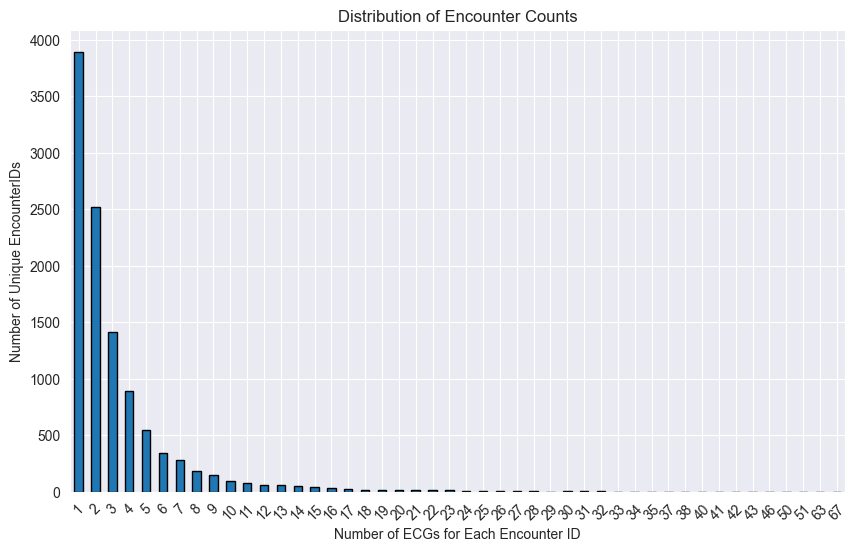

In [22]:
# Look at head of df
display(df_ecg.head(10))

# Proportion of patients with unique encounter ID
total_observations =  df_ecg.shape[0]
icu_observations = df_ecg['uniqueEncId'].notna().sum()
percentage_with_encounter_id = icu_observations / df_ecg.shape[0] * 100

print(f"Total observations: {total_observations}")
print(f"Observations with an encounter ID (ICU): {icu_observations}")
print(f"Percentage of observations with a unique encounter ID: {percentage_with_encounter_id:.2f}%")


def encounter_counts_plot(df):
    """
    Plots a histogram where the x-axis represents the number of rows for each unique EncounterID
    and the y-axis represents how many unique EncounterIDs have that number of rows.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the 'EncounterID' column.
    """
    # Count the occurrences of each EncounterID using value_counts()
    encounter_counts = df['uniqueEncId'].value_counts()

    # Count how many EncounterIDs have the same number of rows
    encounter_frequency = encounter_counts.value_counts()

    #

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    encounter_frequency.sort_index().plot(kind='bar', edgecolor='black')
    plt.title('Distribution of Encounter Counts')
    plt.xlabel('Number of ECGs for Each Encounter ID')
    plt.ylabel('Number of Unique EncounterIDs')
    plt.xticks(rotation=45)
    plt.show()

# Call the function with your dataframe
encounter_counts_plot(df_ecg)

In [23]:
# Count how many patients that has an ECG recording during the first 24 hours of ICU admission.
def count_ecg_within_24h(df_ecg):
    """
    Counts unique patients with at least one ECG recorded in the first 24 hours of ICU admission.
    Also calculates the percentage of these patients out of all unique patients.

    Parameters:
        df_ecg (pd.DataFrame): DataFrame containing ECG data with columns 'uniqueEncId' and 'isDuring24HrICU'.

    Returns:
        tuple: (count of patients with ECG in first 24h, percentage of total patients)
    """

    # Count unique patients who had an ECG within the first 24 hours
    unique_patients_24h = df_ecg[df_ecg["isDuring24HrICU"] == 1]["uniqueEncId"].nunique()

    # Count total unique patients
    total_unique_patients = df_ecg["uniqueEncId"].nunique()

    # Compute percentage
    percentage_24h = (unique_patients_24h / total_unique_patients) * 100 if total_unique_patients > 0 else 0

    return unique_patients_24h, percentage_24h


# Apply to df_ecg
num_patients, percent_patients = count_ecg_within_24h(df_ecg)
print(f"Unique patients with ECG in first 24h: {num_patients}")
print(f"Percentage of those patients out of total patients: {percent_patients:.2f}%")


# Find the earliest ECG (by AcquisitionDateTime) for each unique patient who had at least one ECG recorded in the first 24 hours of ICU admission.
def get_first_ecg_within_24h(df_ecg):
    """
    Finds the earliest ECG (by AcquisitionDateTime) for each unique patient (uniqueEncId)
    who had at least one ECG recorded in the first 24 hours of ICU admission (isDuring24HrICU == 1).

    Parameters:
        df_ecg (pd.DataFrame): DataFrame containing ECG data with columns 'uniqueEncId', 'isDuring24HrICU',
                               'AcquisitionDateTime', and 'filename'.

    Returns:
        pd.DataFrame: A DataFrame with 'filename' and 'uniqueEncId' for the first ECG recorded within 24h.
    """

    # Filter only records where isDuring24HrICU is 1
    df_24h = df_ecg[df_ecg["isDuring24HrICU"] == 1]

    # Find the first (earliest) ECG per uniqueEncId
    df_first_ecg = df_24h.loc[
        df_24h.groupby("uniqueEncId")["AcquisitionDateTime"].idxmin(), ["filename", "uniqueEncId"]]

    return df_first_ecg


# Apply to df_ecg
df_first_ecg = get_first_ecg_within_24h(df_ecg)
print(df_first_ecg.head())

Unique patients with ECG in first 24h: 9074
Percentage of those patients out of total patients: 83.63%
                              filename uniqueEncId
172859  MUSE_20240502_162122_67000.XML       23872
76062   MUSE_20240430_231805_60000.XML     1719688
107339  MUSE_20240501_121655_57000.XML     1757036
226202  MUSE_20240503_153423_42000.XML     2895998
6339    MUSE_20240429_190151_87000.XML     4605079


In [24]:
# Find the earliest ECG (by AcquisitionDateTime) for each unique patient who had at least one ECG recorded in the first 24 hours of ICU admission.
def get_first_ecg_within_24h(df_ecg):
    """
    Finds the earliest ECG (by AcquisitionDateTime) for each unique patient (uniqueEncId)
    who had at least one ECG recorded in the first 24 hours of ICU admission (isDuring24HrICU == 1).

    Parameters:
        df_ecg (pd.DataFrame): DataFrame containing ECG data with columns 'uniqueEncId', 'isDuring24HrICU',
                               'AcquisitionDateTime', and 'filename'.

    Returns:
        pd.DataFrame: A DataFrame with 'filename' and 'uniqueEncId' for the first ECG recorded within 24h.
    """

    # Filter only records where isDuring24HrICU is 1
    df_24h = df_ecg[df_ecg["isDuring24HrICU"] == 1]

    # Find the first (earliest) ECG per uniqueEncId
    df_first_ecg = df_24h.loc[df_24h.groupby("uniqueEncId")["AcquisitionDateTime"].idxmin(), ["filename", "uniqueEncId"]]

    return df_first_ecg

# Apply to df_ecg
df_first_ecg = get_first_ecg_within_24h(df_ecg)
print(df_first_ecg.head())

                              filename uniqueEncId
172859  MUSE_20240502_162122_67000.XML       23872
76062   MUSE_20240430_231805_60000.XML     1719688
107339  MUSE_20240501_121655_57000.XML     1757036
226202  MUSE_20240503_153423_42000.XML     2895998
6339    MUSE_20240429_190151_87000.XML     4605079


In [49]:
# Load ECG selection
select_df = df_first_ecg.iloc[:400]

# Load ECG waveform data
df_selected_wave, x_ecg, ecg_data = load_selected_ecg(
    selected=select_df,
    local_ecg_path=r"L:/SPEC/ICU/RESEARCH/Data-onderzoek/ECG dataset/XML Rosmalen",
    data_path=data_path,
    scale=True,
    save=False
)

# Load and prepare MDS metadata
mds_path = r"L:\SPEC\ICU\RESEARCH\Data-onderzoek\studenten\Econometrie\Bao Phung\ECG loading scripts\data\MDS dataset 2013-2024_withPatientNumbers.xlsx"
mds_df = pd.read_excel(mds_path)

# Required columns including ICU admission/discharge
columns_needed = [
    'lifetimeNumber', 'gender', 'nice_age', 'length', 'weight', 'nice_died',
    'los_hosp', 'nice_ap4_prob', 'nice_ap4_model', 'cardiogroep',
    'cardio_vasc_insuf', 'adm_type', 'nice_adm_icu', 'nice_dis_icu'
]
mds_df = mds_df[columns_needed]

# Type conversions
df_selected_wave['PatientID'] = pd.to_numeric(df_selected_wave['PatientID'], errors='coerce')
mds_df['lifetimeNumber'] = pd.to_numeric(mds_df['lifetimeNumber'], errors='coerce')

df_selected_wave['AcquisitionDateTime'] = pd.to_datetime(df_selected_wave['AcquisitionDateTime'], errors='coerce')
mds_df['nice_adm_icu'] = pd.to_datetime(mds_df['nice_adm_icu'], errors='coerce')
mds_df['nice_dis_icu'] = pd.to_datetime(mds_df['nice_dis_icu'], errors='coerce')

# Drop rows with critical missing values
df_selected_wave.dropna(subset=['PatientID', 'AcquisitionDateTime'], inplace=True)
mds_df.dropna(subset=['lifetimeNumber', 'nice_adm_icu', 'nice_dis_icu'], inplace=True)

# Initialize list for merged rows
merged_rows = []

# Iterate through selected ECGs
for _, ecg_row in df_selected_wave.iterrows():
    pid = ecg_row['PatientID']
    acq_time = ecg_row['AcquisitionDateTime']

    # Filter MDS rows matching PID and ICU window
    valid_mds = mds_df[
        (mds_df['lifetimeNumber'] == pid) &
        (mds_df['nice_adm_icu'] <= acq_time) &
        (mds_df['nice_dis_icu'] >= acq_time)
    ]

    if not valid_mds.empty:
        # Take the first valid ICU stay metadata (if multiple)
        matched_metadata = valid_mds.iloc[0].drop(labels='lifetimeNumber')
    else:
        # No valid metadata -> fill with NaNs
        matched_metadata = pd.Series({col: pd.NA for col in mds_df.columns if col != 'lifetimeNumber'})

    # Combine ECG row with matched metadata
    merged_row = pd.concat([ecg_row, matched_metadata])
    merged_rows.append(merged_row)

# Final merged DataFrame
df_merged = pd.DataFrame(merged_rows)

# Display output info
print("\nFinal Time-Matched Merged DataFrame:")
print(df_merged.info())
print(df_merged.head())

Processed 0/400 ECG files...
Processed 80/400 ECG files...
Processed 120/400 ECG files...
Processed 160/400 ECG files...
Processed 240/400 ECG files...
Processed 320/400 ECG files...
Loading ECGs took 1.12 minutes.
Excluded 0 files due to excess leads.
Excluded 87 files due to missing numeric ECG values.

Final Time-Matched Merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   filename             313 non-null    object        
 1   PatientID            313 non-null    int64         
 2   PatientAge           313 non-null    object        
 3   Gender               313 non-null    object        
 4   VentricularRate      313 non-null    object        
 5   AtrialRate           313 non-null    object        
 6   PRInterval           313 non-null    object        
 7   QRSDuration          313 non-null

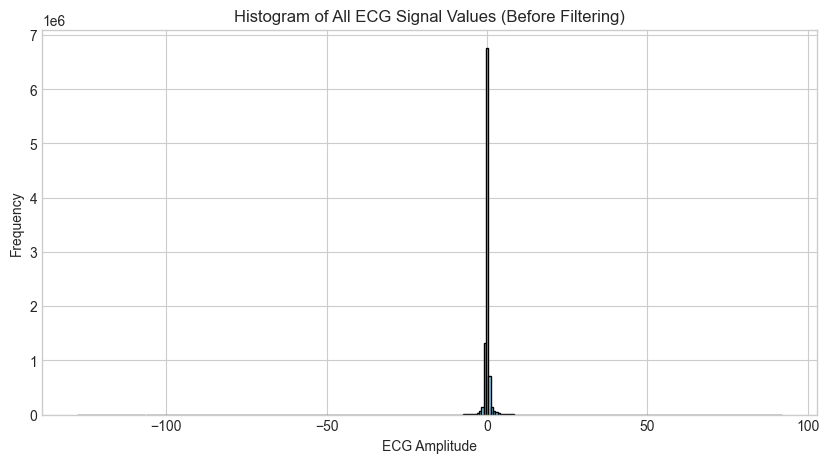

IQR-based Outlier Thresholds:
 - Q1: -0.21296841660146218
 - Q3: 0.16191535818430428
 - Lower bound: -1.712503515744528
 - Upper bound: 1.66145045732737

Original number of samples: 313
Number of samples removed due to IQR outliers: 312
Number of samples after filtering: 1


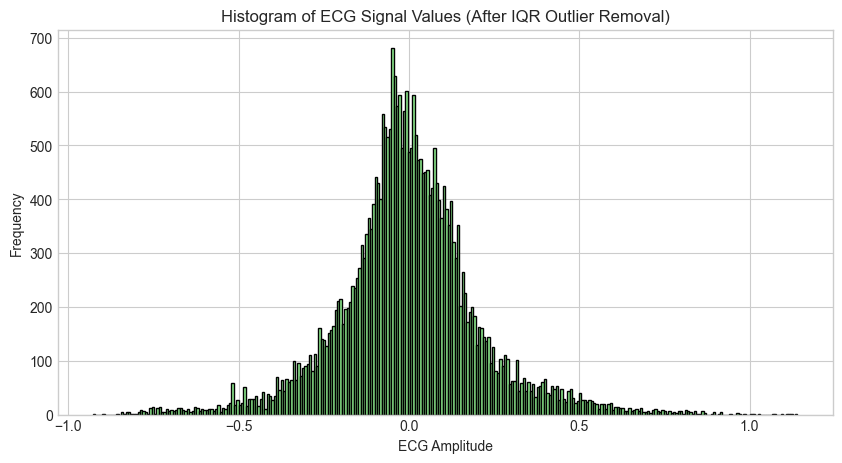

In [72]:
# Flatten and concatenate all values
all_ecg_values = np.concatenate(x_ecg)
flattened_values = np.ravel(all_ecg_values)

# --- Histogram BEFORE filtering ---
plt.figure(figsize=(10, 5))
plt.hist(flattened_values, bins=300, color='skyblue', edgecolor='black')
plt.title('Histogram of All ECG Signal Values (Before Filtering)')
plt.xlabel('ECG Amplitude')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# --- IQR Outlier Filtering ---
Q1 = np.nanpercentile(flattened_values, 25)
Q3 = np.nanpercentile(flattened_values, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 4 * IQR
upper_bound = Q3 + 4* IQR

print(f"IQR-based Outlier Thresholds:")
print(f" - Q1: {Q1}")
print(f" - Q3: {Q3}")
print(f" - Lower bound: {lower_bound}")
print(f" - Upper bound: {upper_bound}")

# Remove samples with any value outside the IQR bounds
original_count = x_ecg.shape[0]
mask = np.array([
    np.all((sample >= lower_bound) & (sample <= upper_bound))
    for sample in x_ecg
])
x_ecg_filtered = x_ecg[mask]

removed_count = original_count - x_ecg_filtered.shape[0]
print(f"\nOriginal number of samples: {original_count}")
print(f"Number of samples removed due to IQR outliers: {removed_count}")
print(f"Number of samples after filtering: {x_ecg_filtered.shape[0]}")

# Override x_ecg with x_ecg_filtered
x_ecg = x_ecg_filtered

# --- Histogram AFTER filtering ---
flattened_filtered = np.ravel(np.concatenate(x_ecg_filtered))

plt.figure(figsize=(10, 5))
plt.hist(flattened_filtered, bins=300, color='lightgreen', edgecolor='black')
plt.title('Histogram of ECG Signal Values (After IQR Outlier Removal)')
plt.xlabel('ECG Amplitude')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [27]:
# Select numeric ECG features
ecg_intervals = ["VentricularRate", "AtrialRate", "PRInterval", "QRSDuration", "QTInterval", "QTCorrected", "PAxis", "RAxis", "TAxis", "QRSCount"]
df_merged[ecg_intervals].describe()

,VentricularRate,AtrialRate,PRInterval,QRSDuration,QTInterval,QTCorrected,PAxis,RAxis,TAxis,QRSCount
count,417,417,417,417,417,417,417,417,417,417
unique,75,79,106,75,126,126,106,158,161,18
top,80,80,160,92,390,462,66,79,89,14
freq,28,24,16,31,16,14,15,11,11,64


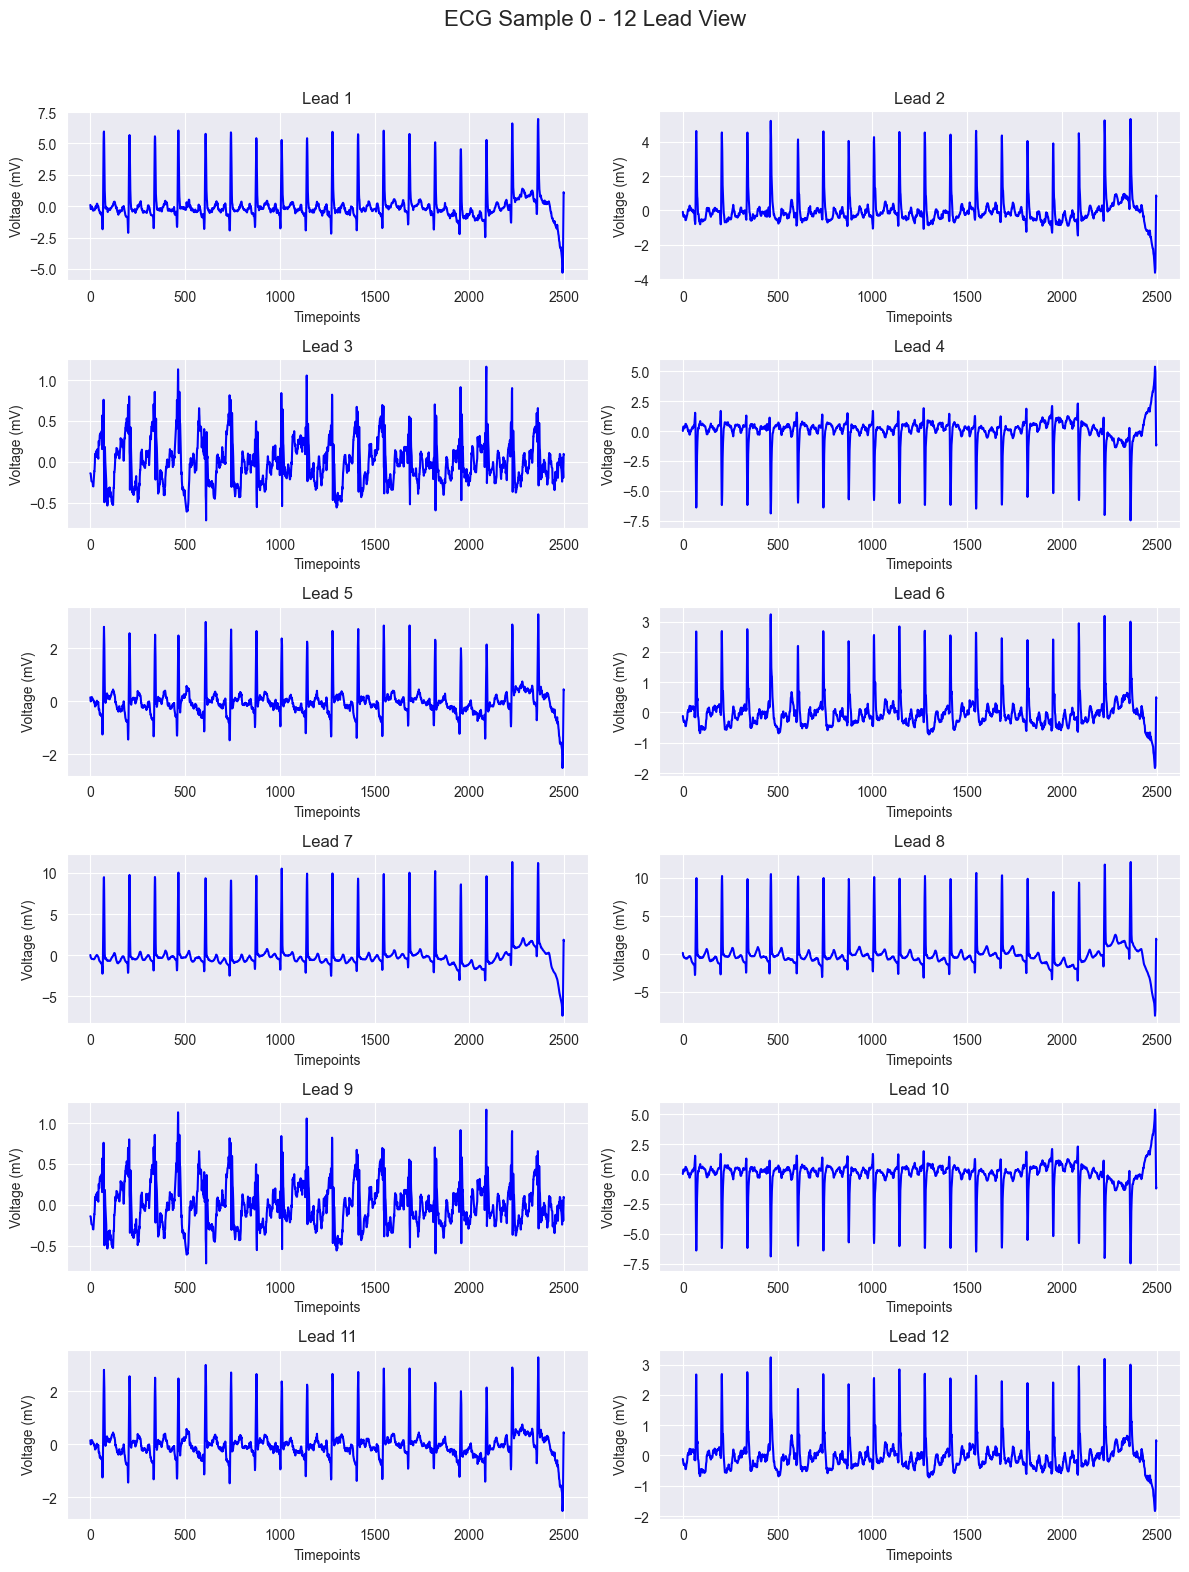

In [28]:
def plot_ecg_example(ecg_data, sample_idx=0, leads=list(range(12)), time_range=None):
    """
    Plots 12 ECG leads of a sample as separate subplots in one figure (3x4 layout).

    Parameters:
    - ecg_data: numpy array of shape (n_samples, n_timepoints, n_leads)
    - sample_idx: index of the ECG sample to plot
    - leads: list of lead indices to plot (default: all 12 leads)
    - time_range: tuple (start, end) to zoom in (default: full length)
    """
    timepoints = ecg_data.shape[1]
    if time_range is None:
        time_range = (0, timepoints)

    fig, axes = plt.subplots(6, 2, figsize=(12, 16))
    axes = axes.flatten()

    for i, lead in enumerate(leads):
        ax = axes[i]
        signal = ecg_data[sample_idx, time_range[0]:time_range[1], lead]
        ax.plot(range(time_range[0], time_range[1]), signal, color='blue')
        ax.set_title(f"Lead {lead + 1}")
        ax.set_xlabel("Timepoints")
        ax.set_ylabel("Voltage (mV)")
        ax.grid(True)

    # Hide any unused subplots if fewer than 12 leads
    for j in range(len(leads), len(axes)):
        axes[j].axis('off')

    fig.suptitle(f"ECG Sample {sample_idx} - 12 Lead View", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example usage
plot_ecg_example(x_ecg, sample_idx=0)



Minimum value of 91.99107417087409 found in:
- Sample index: 186
- Timepoint index: 1268
- Lead index: 9


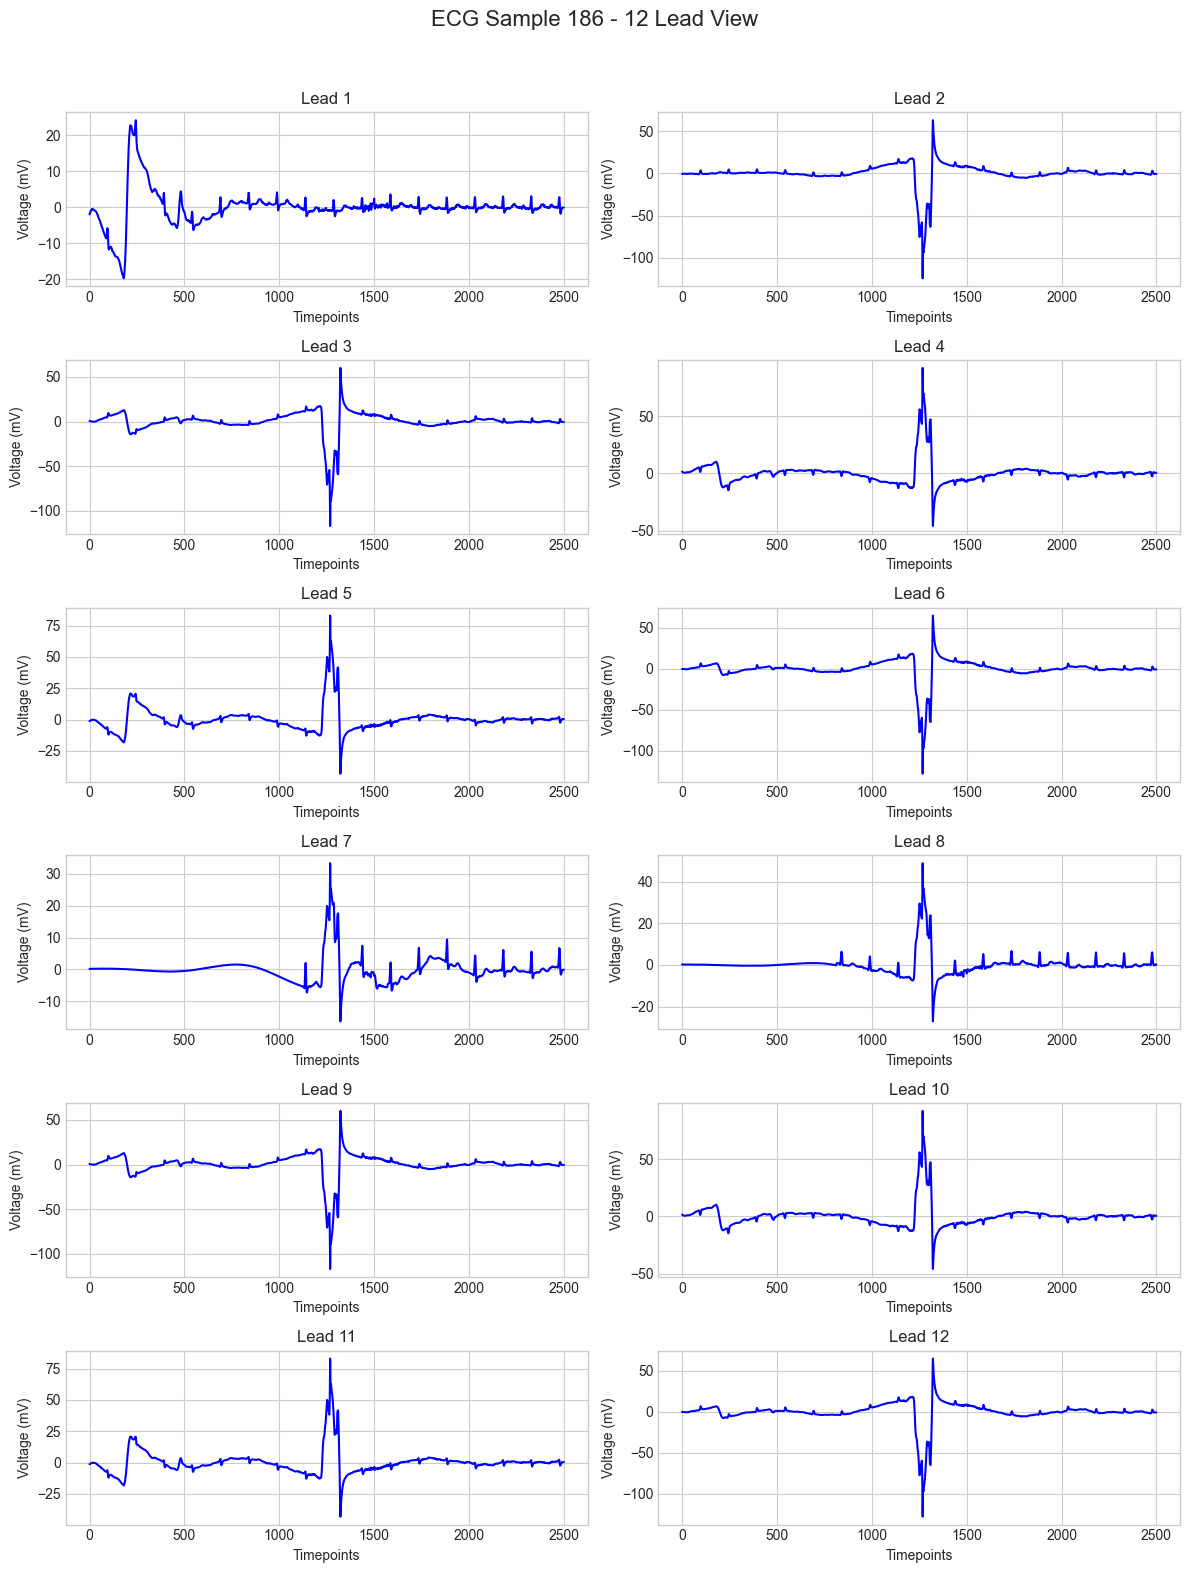

In [67]:
global_max = np.nanmax(x_ecg)

# Step 2: Find the sample, timepoint, and lead where the min value occurs
max_indices = np.where(x_ecg == global_max)

# If there are multiple occurrences, take the first one
sample_idx, time_idx, lead_idx = max_indices[0][0], max_indices[1][0], max_indices[2][0]

print(f"\nMinimum value of {global_max} found in:")
print(f"- Sample index: {sample_idx}")
print(f"- Timepoint index: {time_idx}")
print(f"- Lead index: {lead_idx}")

# Step 3: Plot the ECG of the sample with the min value
plot_ecg_example(x_ecg, sample_idx=sample_idx)

Verify the shape and type of the ECG data
Standardize the data for VRAE application

In [29]:
# Check type and shape of the data
print("Type of x_ecg:", type(x_ecg))
if isinstance(x_ecg, np.ndarray):
    print("Shape of x_ecg:", x_ecg.shape)  # (n_samples, n_timepoints, n_leads)
    print("Number of samples:", x_ecg.shape[0])
    print("Number of timepoints per sample:", x_ecg.shape[1])
    print("Number of leads per sample:", x_ecg.shape[2])
else:
    raise ValueError("x_ecg is not a numpy array")

# Standardize the data

Type of x_ecg: <class 'numpy.ndarray'>
Shape of x_ecg: (313, 2500, 12)
Number of samples: 313
Number of timepoints per sample: 2500
Number of leads per sample: 12


Apply VRAE:
- Split data
- Set up model parameters

In [30]:
# Add plot function for train vs validation losses
import matplotlib.pyplot as plt

def plot_losses(model, title=None):
    plt.figure(figsize=(8, 5))
    plt.plot(model.train_losses, label='Train Loss')
    if hasattr(model, 'val_losses') and model.val_losses:
        plt.plot(model.val_losses, label='Validation Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(title or "Training vs Validation Loss")
    plt.legend()
    plt.grid(True)
    plt.show()


In [31]:
# Check correct standardization
import numpy as np

lead_means = np.mean(x_ecg, axis=(0, 1))
lead_stds = np.std(x_ecg, axis=(0, 1))

print("Per-lead mean after standardization:")
print(np.round(lead_means, 4))

print("\nPer-lead std after standardization:")
print(np.round(lead_stds, 4))


Per-lead mean after standardization:
[ 0.  0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0.]

Per-lead std after standardization:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


VRAE application

In [32]:
import os
import time
import torch
from torch.utils.data import TensorDataset
from sklearn.model_selection import ParameterGrid, train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

# Setup
output_dir = './ecg_model_logs'
os.makedirs(output_dir, exist_ok=True)
log_path = os.path.join(output_dir, 'training_log.txt')

# Clear previous log file
with open(log_path, 'w') as f:
    f.write("--- Starting Hyperparameter Tuning Log ---\n")

print(f"Output directory: {output_dir}")
print(f"Log file: {log_path}")

# Load and Split Data
x_train, x_val = train_test_split(x_ecg, test_size=0.2, random_state=42, shuffle=True)

train_dataset = TensorDataset(torch.from_numpy(x_train).float())
valid_dataset = TensorDataset(torch.from_numpy(x_val).float())

print(f"Data split: {len(train_dataset)} training samples, {len(valid_dataset)} validation samples.")

# Search space for VRAE
param_grid_vrae = {
    'hidden_size': [16, 32],
    'latent_length': [8],
    'batch_size': [32],
    'learning_rate': [1e-3],
    'beta': [0.001],
    'hidden_layer_depth': [1,2],
}

# Fixed Parameters
sequence_length = x_train.shape[1]
number_of_features = x_train.shape[2]

n_epochs = 20
optimizer = 'Adam'
cuda = torch.cuda.is_available()
print_every = 100
clip = True
dropout = 0
max_grad_norm = 5
loss = 'MSELoss'
block = 'LSTM'

print(f"\nCUDA available: {cuda}")

# VRAE Hyperparameter Tuning
print("\n" + "="*50)
print(" VRAE HYPERPARAMETER TUNING ".center(50, "="))
print("="*50)

best_vrae_valid_loss = float('inf')
best_vrae_params = None
best_vrae_losses = {}
best_vrae_model_path = os.path.join(output_dir, 'best_vrae_model.pth')

# List to store results from each run for final reporting
results_list = []

for i, params in enumerate(ParameterGrid(param_grid_vrae)):
    print(f"\n[VRAE Run {i+1}/{len(ParameterGrid(param_grid_vrae))}] Training with params: {params}")
    with open(log_path, 'a') as f:
        f.write(f"\n=== [VRAE] Training with params: {params} ===\n")

    # VRAE definition
    vrae = VRAE(
        sequence_length=sequence_length,
        number_of_features=number_of_features,
        hidden_size=params['hidden_size'],
        hidden_layer_depth=params['hidden_layer_depth'],
        latent_length=params['latent_length'],
        batch_size=params['batch_size'],
        learning_rate=params['learning_rate'],
        n_epochs=n_epochs,
        dropout_rate=dropout,
        optimizer=optimizer,
        cuda=cuda,
        print_every=print_every,
        clip=clip,
        max_grad_norm=max_grad_norm,
        loss=loss,
        block=block,
        dload=output_dir,
        beta=params['beta'],
    )

    start_time = time.time()
    vrae.fit(train_dataset, valid_dataset=valid_dataset)
    runtime = time.time() - start_time

    # Get final losses, handle cases where training might fail
    final_valid_loss = vrae.valid_losses[-1] if vrae.valid_losses else float('inf')
    final_train_loss = vrae.train_losses[-1] if vrae.train_losses else float('inf')
    final_recon_loss = vrae.train_recon_losses[-1] if vrae.train_recon_losses else float('inf')
    final_kl_loss = vrae.train_kl_losses[-1] if vrae.train_kl_losses else float('inf')

    with open(log_path, 'a') as f:
        f.write(f"[VRAE] Final Train Loss: {final_train_loss:.4f} (Recon: {final_recon_loss:.4f}, KL: {final_kl_loss:.4f})\n")
        f.write(f"[VRAE] Final Validation Loss: {final_valid_loss:.4f}\n")
        f.write(f"[VRAE] Training time: {runtime:.2f} seconds\n")

    # Store results for this run
    run_results = params.copy()
    run_results['final_train_loss'] = final_train_loss
    run_results['final_valid_loss'] = final_valid_loss
    run_results['final_recon_loss'] = final_recon_loss
    run_results['final_kl_loss'] = final_kl_loss
    run_results['runtime_seconds'] = runtime
    results_list.append(run_results)

    if final_valid_loss < best_vrae_valid_loss:
        best_vrae_valid_loss = final_valid_loss
        best_vrae_params = params
        best_vrae_losses = {
            'train': vrae.train_losses,
            'recon': vrae.train_recon_losses,
            'kl': vrae.train_kl_losses,
            'valid': vrae.valid_losses
        }
        # Save the model state dictionary
        torch.save(vrae.state_dict(), best_vrae_model_path)
        print(f" New best VRAE model found with validation loss: {best_vrae_valid_loss:.4f}")
        print(f"   Model saved to {best_vrae_model_path}")


# Reporting and Visualization
print("\n" + "="*50)
print(" TUNING COMPLETE: REPORTING RESULTS ".center(50, "="))
print("="*50)

if not results_list:
    print("No training runs were completed. Exiting.")
else:
    # --- Create and save results table ---
    results_df = pd.DataFrame(results_list)
    results_df = results_df.sort_values(by='final_valid_loss', ascending=True)
    results_csv_path = os.path.join(output_dir, 'vrae_tuning_results.csv')
    results_df.to_csv(results_csv_path, index=False)

    print("\n--- Hyperparameter Tuning Results Summary ---")
    print(results_df)
    print(f"\nFull results table saved to: {results_csv_path}")

    # --- Save the best parameters to a JSON file ---
    best_params_path = os.path.join(output_dir, 'best_vrae_params.json')
    with open(best_params_path, 'w') as f:
        json.dump(best_vrae_params, f, indent=4)

    print("\n--- Best Performing Model ---")
    print(f"Validation Loss: {best_vrae_valid_loss:.4f}")
    print("Parameters:")
    print(json.dumps(best_vrae_params, indent=4))
    print(f"\nBest parameters saved to: {best_params_path}")
    print(f"Best model state dictionary saved to: {best_vrae_model_path}")

    # --- Plot and save loss curves for the best model ---
    if best_vrae_losses:
        plt.figure(figsize=(12, 6))
        plt.plot(best_vrae_losses['train'], label='Training Loss')
        plt.plot(best_vrae_losses['valid'], label='Validation Loss', linestyle='--')
        plt.title(f'Best VRAE Model: Training and Validation Loss\nParams: {str(best_vrae_params)}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plot_path = os.path.join(output_dir, 'best_vrae_loss_curves.png')
        plt.savefig(plot_path)
        plt.close()
        print(f"Loss curve plot for best model saved to: {plot_path}")






Output directory: ./ecg_model_logs
Log file: ./ecg_model_logs\training_log.txt
Data split: 250 training samples, 63 validation samples.

CUDA available: False

=========== VRAE HYPERPARAMETER TUNING ===========

[VRAE Run 1/4] Training with params: {'batch_size': 32, 'beta': 0.001, 'hidden_layer_depth': 1, 'hidden_size': 16, 'latent_length': 8, 'learning_rate': 0.001}
Epoch 1/20
  → Avg Train Loss: 0.6460 (Recon: 0.6460, KL: 0.0150, Current Beta: 0.0000) | Avg Valid Loss: 3.9303
Epoch 2/20
  → Avg Train Loss: 0.5692 (Recon: 0.5692, KL: 0.0177, Current Beta: 0.0000) | Avg Valid Loss: 3.8372
Epoch 3/20
  → Avg Train Loss: 0.5510 (Recon: 0.5510, KL: 0.0213, Current Beta: 0.0000) | Avg Valid Loss: 3.7599
Epoch 4/20
  → Avg Train Loss: 0.4604 (Recon: 0.4604, KL: 0.0255, Current Beta: 0.0000) | Avg Valid Loss: 3.7094
Epoch 5/20
  → Avg Train Loss: 0.4631 (Recon: 0.4631, KL: 0.0306, Current Beta: 0.0000) | Avg Valid Loss: 3.6698
Epoch 6/20
  → Avg Train Loss: 0.4367 (Recon: 0.4367, KL: 0.0371

Cluster analysis
- Different clustering algorithms
- Silhoutte scores for different cluster sizes
- t-SNE visualization of the best clustering result

In [34]:
# Rerun best model for detailed loss
output_dir = './ecg_model_logs'
os.makedirs(output_dir, exist_ok=True)
log_path = os.path.join(output_dir, 'training_log.txt')

# Clear previous log file
with open(log_path, 'w') as f:
    f.write("--- Starting Single Model Training Log ---\n\n")

print(f"Output directory: {output_dir}")
print(f"Log file: {log_path}")

# Load and Split Data
x_train, x_val = train_test_split(x_ecg, test_size=0.3, random_state=42, shuffle=True)

train_dataset = TensorDataset(torch.from_numpy(x_train).float())
valid_dataset = TensorDataset(torch.from_numpy(x_val).float())

print(f"Data split: {len(train_dataset)} training samples, {len(valid_dataset)} validation samples.")

# --- 3. Define Model Parameters ---
# Parameters for the single run
# Parameters chosen from full dataset
params = {
    'batch_size': 32,
    'beta': 0.01,
    'hidden_layer_depth': 2,
    'hidden_size': 64,
    'latent_length': 32,
    'learning_rate': 0.001,
    'n_epochs': 20
}

# Fixed parameters
sequence_length = x_train.shape[1]
number_of_features = x_train.shape[2]
optimizer = 'Adam'
cuda = torch.cuda.is_available()
print_every = 100  # Note: The provided fit method prints per epoch, so this might not be used there.
clip = True
dropout = 0
max_grad_norm = 5
loss = 'MSELoss'
block = 'LSTM'

print(f"\nCUDA available: {cuda}")
print("\n" + "="*50)
print(" VRAE SINGLE MODEL TRAINING ".center(50, "="))
print("="*50)

# Log the parameters being used
print("\nTraining with the following parameters:")
print(json.dumps(params, indent=4))
with open(log_path, 'a') as f:
    f.write("--- Model Parameters ---\n")
    f.write(json.dumps(params, indent=4))
    f.write("\n\n--- Training Log ---\n")

# --- 4. Instantiate and Train the VRAE Model ---
vrae = VRAE(
    sequence_length=sequence_length,
    number_of_features=number_of_features,
    hidden_size=params['hidden_size'],
    hidden_layer_depth=params['hidden_layer_depth'],
    latent_length=params['latent_length'],
    batch_size=params['batch_size'],
    learning_rate=params['learning_rate'],
    n_epochs=params['n_epochs'],
    dropout_rate=dropout,
    optimizer=optimizer,
    cuda=cuda,
    print_every=print_every,
    clip=clip,
    max_grad_norm=max_grad_norm,
    loss=loss,
    block=block,
    dload=output_dir,
    beta=params['beta'],
)

# Your provided fit method already tracks detailed losses, which is perfect.
# Redirecting print output to log file during fit
def log_and_print(message, f):
    print(message)
    f.write(message + '\n')

# We can't directly redirect prints from inside the class easily without modifying it.
# The VRAE's internal prints will go to the console. We will log our summary here.
start_time = time.time()
vrae.fit(train_dataset, valid_dataset=valid_dataset)
runtime = time.time() - start_time

# --- 5. Reporting and Visualization ---
print("\n" + "="*50)
print(" TRAINING COMPLETE: REPORTING RESULTS ".center(50, "="))
print("="*50)

# Get final losses
final_train_loss = vrae.train_losses[-1]
final_recon_loss = vrae.train_recon_losses[-1]
final_kl_loss = vrae.train_kl_losses[-1]
final_valid_loss = vrae.valid_losses[-1] if vrae.valid_losses else 'N/A'
model_path = os.path.join(output_dir, 'vrae_model.pth')

# Save the model state dictionary
torch.save(vrae.state_dict(), model_path)

# Log final results
with open(log_path, 'a') as f:
    f.write("\n\n--- Final Results ---\n")
    log_and_print(f"\nTraining completed in {runtime:.2f} seconds.", f)
    log_and_print(f"Final Training Loss: {final_train_loss:.4f}", f)
    log_and_print(f"  -> Final Recon Loss: {final_recon_loss:.4f}", f)
    log_and_print(f"  -> Final KL Loss: {final_kl_loss:.4f}", f)
    if final_valid_loss != 'N/A':
        log_and_print(f"Final Validation Loss: {final_valid_loss:.4f}", f)
    log_and_print(f"\nModel saved to: {model_path}", f)


# --- Plot and save detailed loss curves ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
fig.suptitle(f'Best VRAE Model Training and Loss Components', fontsize=16)

# Subplot 1: Total Train and Validation Loss
ax1.plot(vrae.train_losses, label='Total Training Loss', color='navy')
if vrae.valid_losses:
    ax1.plot(vrae.valid_losses, label='Validation Loss', linestyle='--', color='darkorange')
ax1.set_ylabel('Loss')
ax1.set_title('Overall Model Loss')
ax1.legend()

# Subplot 2: Detailed Training Loss Components
ax2.plot(vrae.train_recon_losses, label='Training Reconstruction Loss', color='green')
ax2.plot(vrae.train_kl_losses, label='Training KL Divergence Loss', color='firebrick')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Training Loss Components')
ax2.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plot_path = os.path.join(output_dir, 'vrae_detailed_loss_curves.png')
plt.savefig(plot_path)
plt.close()


Output directory: ./ecg_model_logs
Log file: ./ecg_model_logs\training_log.txt
Data split: 219 training samples, 94 validation samples.

CUDA available: False

=========== VRAE SINGLE MODEL TRAINING ===========

Training with the following parameters:
{
    "batch_size": 32,
    "beta": 0.01,
    "hidden_layer_depth": 2,
    "hidden_size": 64,
    "latent_length": 32,
    "learning_rate": 0.001,
    "n_epochs": 20
}
Epoch 1/20
  → Avg Train Loss: 0.5082 (Recon: 0.5082, KL: 0.0071, Current Beta: 0.0000) | Avg Valid Loss: 2.3618
Epoch 2/20
  → Avg Train Loss: 0.3875 (Recon: 0.3875, KL: 0.0092, Current Beta: 0.0000) | Avg Valid Loss: 2.1681
Epoch 3/20
  → Avg Train Loss: 0.3152 (Recon: 0.3152, KL: 0.0169, Current Beta: 0.0000) | Avg Valid Loss: 2.0326
Epoch 4/20
  → Avg Train Loss: 0.2614 (Recon: 0.2614, KL: 0.0413, Current Beta: 0.0000) | Avg Valid Loss: 1.9501
Epoch 5/20
  → Avg Train Loss: 0.2324 (Recon: 0.2324, KL: 0.1404, Current Beta: 0.0000) | Avg Valid Loss: 1.8950
Epoch 6/20
  → 

________________________________________________



In [56]:
# Clinical relevance analysis (new cluster analysis code block)
import json
import os
import torch
from torch.utils.data import TensorDataset
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


x_train, x_val, df_train, df_val = train_test_split(
    x_ecg, df_merged, test_size=0.2, random_state=42
)
print(f"Training set size: {len(x_train)} samples")
print(f"Validation set size: {len(x_val)} samples")

# Load VRAE Model and Generate Latent Vectors for Validation Set

print("\n--- Part 3: Loading VRAE and Generating Latent Vectors ---")
output_dir = './ecg_model_logs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

best_params_path = os.path.join(output_dir, 'best_vrae_params.json')
best_vrae_model_path = os.path.join(output_dir, 'best_vrae_model.pth')

if not os.path.exists(best_params_path):
    with open(best_params_path, 'w') as f: json.dump({'hidden_size': 64}, f)
with open(best_params_path, 'r') as f:
    best_vrae_params = json.load(f)

sequence_length = x_train.shape[1]
number_of_features = x_train.shape[2]
best_model = VRAE(**best_vrae_params, sequence_length=sequence_length, number_of_features=number_of_features)

if not os.path.exists(best_vrae_model_path):
    torch.save(best_model.state_dict(), best_vrae_model_path)
best_model.load_state_dict(torch.load(best_vrae_model_path))
best_model.is_fitted = True
best_model.eval()
print("Loaded best VRAE model.")

# Generate latent representations ONLY for the validation set
val_tensor = torch.from_numpy(x_val).float()
val_dataset = TensorDataset(val_tensor)
latent_vectors = best_model.transform(val_dataset)
print(f"Generated {latent_vectors.shape[0]} latent vectors for the validation set.")


# Elbow Method for K-Means
inertia = []
k_range = range(2, 7)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(latent_vectors)
    inertia.append(kmeans.inertia_)
    print(f"K-Means (k={k}): Inertia = {kmeans.inertia_:.4f}")

# Plotting the elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.xticks(k_range)
plt.grid(True)
elbow_plot_path = os.path.join(output_dir, 'kmeans_elbow_plot.png')
plt.savefig(elbow_plot_path)
plt.close()
print(f"\nElbow method plot saved to: {elbow_plot_path}")

# --- Run Clustering Algorithms and get Silhouette Scores ---
cluster_ranges = range(2, 7)
clustering_results = []
# K-Means
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(latent_vectors)
    score = silhouette_score(latent_vectors, labels)
    clustering_results.append({'Method': 'K-Means', 'Num Clusters': k, 'Silhouette Score': score, 'labels': labels})
    print(f"K-Means (k={k}): Silhouette Score = {score:.4f}")

# K-Means
for k in cluster_ranges:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(latent_vectors)
    score = silhouette_score(latent_vectors, labels)
    clustering_results.append({'Method': 'K-Means', 'Num Clusters': k, 'Silhouette Score': score, 'labels': labels})
    print(f"K-Means (k={k}): Silhouette Score = {score:.4f}")

# Agglomerative
for k in cluster_ranges:
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(latent_vectors)
    score = silhouette_score(latent_vectors, labels)
    clustering_results.append({'Method': 'Agglomerative', 'Num Clusters': k, 'Silhouette Score': score, 'labels': labels})
    print(f"Agglomerative (k={k}): Silhouette Score = {score:.4f}")

# DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
labels = dbscan.fit_predict(latent_vectors)
num_clusters_found = len(set(labels)) - (1 if -1 in labels else 0)
if num_clusters_found > 1:
    score = silhouette_score(latent_vectors, labels)
    print(f"DBSCAN: Found {num_clusters_found} clusters. Silhouette Score = {score:.4f}")
else:
    score = -1.0 # Or np.nan
    print(f"DBSCAN: Found {num_clusters_found} clusters. Silhouette score cannot be calculated.")
clustering_results.append({'Method': 'DBSCAN', 'Num Clusters': num_clusters_found, 'Silhouette Score': score, 'labels': labels})

# Report & save clustering results
clustering_df = pd.DataFrame(clustering_results)
clustering_df = clustering_df.sort_values(by='Silhouette Score', ascending=False)
print("\nClustering Analysis Summary:")
print(clustering_df.drop(columns='labels').to_string(index=False))

clustering_csv_path = os.path.join(output_dir, 'vrae_clustering_results.csv')
clustering_df.drop(columns='labels').to_csv(clustering_csv_path, index=False)
print(f"\nClustering results saved to: {clustering_csv_path}")

# --- Bar chart for Silhouette Scores ---
plt.figure(figsize=(12, 7))
# Create a unique identifier for each bar
clustering_df['Method-K'] = clustering_df.apply(lambda row: f"{row['Method']} (k={row['Num Clusters']})", axis=1)
# Filter out results where score couldn't be calculated if desired
plot_df = clustering_df[clustering_df['Silhouette Score'] > -1.0]
sns.barplot(x='Silhouette Score', y='Method-K', data=plot_df, orient='h', hue='Method-K', palette='viridis', legend=False)
plt.title('Comparison of Silhouette Scores for Clustering Methods')
plt.xlabel('Silhouette Score')
plt.ylabel('Clustering Method and Number of Clusters (k)')
plt.tight_layout()
sil_plot_path = os.path.join(output_dir, 'clustering_silhouette_scores.png')
plt.savefig(sil_plot_path)
plt.close()
print(f"Silhouette score comparison chart saved to: {sil_plot_path}")

# t-SNE visualization for the clustering results
print("\n--- Generating t-SNE Visualizations for All Clustering Results ---")

# Ensure perplexity is less than number of samples
perplexity_value = min(30, len(latent_vectors) - 1)

# Run t-SNE once to save compute time
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
tsne_results = tsne.fit_transform(latent_vectors)

for idx, result in clustering_df.iterrows():
    method = result['Method']
    k = result['Num Clusters']
    score = result['Silhouette Score']
    labels = result['labels']

    # Skip visualizing if only one cluster
    if len(np.unique(labels)) <= 1:
        print(f"Skipping t-SNE for {method} (k={k}): Only one cluster.")
        continue

    print(f"Generating t-SNE for {method} (k={k})...")

    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=tsne_results[:, 0], y=tsne_results[:, 1],
        hue=labels,
        palette=sns.color_palette("hsv", len(np.unique(labels))),
        legend='full'
    )
    plt.title(f't-SNE of Latent Space\n{method} (k={k}) | Silhouette: {score:.4f}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Safe filename
    filename = f"tsne_{method.replace(' ', '_').lower()}_k{k}.png"
    tsne_plot_path = os.path.join(output_dir, filename)
    plt.savefig(tsne_plot_path)
    plt.close()
    print(f"t-SNE plot saved to: {tsne_plot_path}")


# =============================================================================
# Part 5: Generate Detailed Clinical Heatmaps for K-Means
# =============================================================================
print("\n--- Part 5: Generating Clinical Characterization Heatmaps ---")
heatmap_output_dir = os.path.join(output_dir, 'cluster_heatmaps_detailed')
if not os.path.exists(heatmap_output_dir):
    os.makedirs(heatmap_output_dir)

# --- Pre-process the VALIDATION clinical data for analysis ---
df_analysis = df_val.copy() # Use the validation metadata
df_analysis['gender_male'] = (df_analysis['gender'] == 'M').astype(int)
df_analysis['is_cabg'] = (df_analysis['nice_ap4_model'] == 'CABG').astype(int)
df_analysis['cardiogroep'] = df_analysis['cardiogroep'].fillna('Unknown')
df_analysis['adm_type'] = df_analysis['adm_type'].fillna('Unknown')

# --- Define Variable Groupings for the Heatmap ---
mean_vars = {'Age (years)': 'nice_age', 'Height (cm)': 'length', 'Weight (kg)': 'weight', 'APACHE IV Probability': 'nice_ap4_prob', 'Hospital Length of Stay (days)': 'los_hosp'}
proportion_vars = {'Gender (% Male)': 'gender_male', 'Admission Model (% CABG)': 'is_cabg', 'ICU Mortality': 'nice_died', 'Required Vasoactive Meds': 'cardio_vasc_insuf'}
float_format_rows = list(mean_vars.keys()) + list(proportion_vars.keys())

# --- Generate a Heatmap for each K-Means Result ---

print("\n--- Part 5: Generating Clinical Characterization Heatmaps ---")
heatmap_output_dir = os.path.join(output_dir, 'cluster_heatmaps_detailed')
if not os.path.exists(heatmap_output_dir):
    os.makedirs(heatmap_output_dir)

# --- Pre-process the VALIDATION clinical data for analysis ---
df_analysis = df_val.copy()  # Use the validation metadata
df_analysis['gender_male'] = (df_analysis['gender'] == 'M').astype(int)
df_analysis['is_cabg'] = (df_analysis['nice_ap4_model'] == 'CABG').astype(int)
df_analysis['cardiogroep'] = df_analysis['cardiogroep'].fillna('Unknown')
df_analysis['adm_type'] = df_analysis['adm_type'].fillna('Unknown')

# --- Define Variable Groupings for the Heatmap ---
mean_vars = {
    'Age (years)': 'nice_age',
    'Height (cm)': 'length',
    'Weight (kg)': 'weight',
    'APACHE IV Probability': 'nice_ap4_prob',
    'Hospital Length of Stay (days)': 'los_hosp'
}
proportion_vars = {
    'Gender (% Male)': 'gender_male',
    'Admission Model (% CABG)': 'is_cabg',
    'ICU Mortality': 'nice_died',
    'Required Vasoactive Meds': 'cardio_vasc_insuf'
}
float_format_rows = list(mean_vars.keys()) + list(proportion_vars.keys())

# --- Generate a Heatmap for each K-Means Result ---
kmeans_results = clustering_df[clustering_df['Method'] == 'K-Means'].sort_values('Num Clusters')

for index, result in kmeans_results.iterrows():
    k = result['Num Clusters']
    labels = result['labels']
    print(f"Generating heatmap for k={k}...")

    df_clustered = df_analysis.iloc[:len(labels)].copy()
    df_clustered['cluster'] = labels + 1

    # --- Calculate Statistics per cluster ---
    all_stats_list = []
    for d_name, c_name in {**mean_vars, **proportion_vars}.items():
        all_stats_list.append(df_clustered.groupby('cluster')[c_name].mean().rename(d_name))
    summary_df = pd.concat(all_stats_list, axis=1).T

    # Admission type counts
    adm_type_counts = pd.crosstab(df_clustered['adm_type'], df_clustered['cluster'])
    adm_type_counts.index = [f"Adm: {idx}" for idx in adm_type_counts.index]

    # Diagnosis counts
    diag_counts = pd.crosstab(df_clustered['cardiogroep'], df_clustered['cluster'])
    diag_counts.index = [f"Diag: {idx}" for idx in diag_counts.index]

    # Combine all into summary table
    summary_df = pd.concat([summary_df, adm_type_counts, diag_counts])

    # --- Drop rows that are entirely zero (across clusters only, not 'Total') ---
    cluster_cols = summary_df.columns  # All clusters
    rows_with_data = summary_df[cluster_cols].sum(axis=1) > 0
    summary_df = summary_df[rows_with_data]

    # --- Add Total column for each row (diagnosis, admission, or variable) ---
    summary_df['Total'] = 0.0
    all_var_map = {**mean_vars, **proportion_vars}
    for idx, row in summary_df.iterrows():
        if idx in all_var_map:
            summary_df.loc[idx, 'Total'] = df_clustered[all_var_map[idx]].mean()
        else:
            summary_df.loc[idx, 'Total'] = row.drop('Total').sum()

    # --- Add final 'Total Patients' row across clusters ---
    total_row = df_clustered['cluster'].value_counts().sort_index()
    total_row.name = 'Total Patients'
    summary_df = pd.concat([summary_df, pd.DataFrame(total_row).T])
    summary_df.loc['Total Patients', 'Total'] = summary_df.loc['Total Patients'].drop('Total').sum()

    # --- Prepare data for heatmap ---
    heatmap_data = summary_df.drop(columns='Total').iloc[:-1]  # exclude final row
    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)

    # --- Prepare annotation strings ---
    annot_data_str = summary_df.copy()
    for r_idx in annot_data_str.index:
        for c_idx in annot_data_str.columns:
            val = summary_df.loc[r_idx, c_idx]
            if r_idx in float_format_rows:
                annot_data_str.loc[r_idx, c_idx] = f"{val:.2f}"
            else:
                annot_data_str.loc[r_idx, c_idx] = f"{int(val)}"

    # --- Plot the heatmap ---
    plt.figure(figsize=(14, max(10, 0.5 * len(summary_df))))
    ax = sns.heatmap(
        heatmap_data,
        annot=annot_data_str.iloc[:-1, :-1],
        fmt='s',
        cmap='Blues',
        linewidths=.5,
        cbar_kws={'label': 'Fraction of Category Total per Cluster'}
    )

    # Add Total column on the right
    for i, idx in enumerate(summary_df.index[:-1]):
        ax.text(len(summary_df.columns) - 0.5, i + 0.5,
                annot_data_str.loc[idx, 'Total'],
                ha='center', va='center', color='black', fontweight='bold')

    # Add Total row at the bottom
    for j, col in enumerate(summary_df.columns):
        ax.text(j + 0.5, len(summary_df.index) - 0.5,
                annot_data_str.loc['Total Patients', col],
                ha='center', va='center', color='black', fontweight='bold')

    ax.set_title(f'Clinical Profiles for K-Means Clusters (k={k})', fontsize=16, pad=20)
    ax.set_xlabel('Cluster', fontsize=12)
    ax.set_ylabel('')
    plt.tight_layout(rect=[0, 0, 0.9, 1])

    fig_path = os.path.join(heatmap_output_dir, f'kmeans_k{k}_heatmap_detailed.png')
    plt.savefig(fig_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"  > Heatmap saved to: {fig_path}")

print("\n\nWorkflow complete. All heatmaps generated successfully.")

Training set size: 250 samples
Validation set size: 63 samples

--- Part 3: Loading VRAE and Generating Latent Vectors ---
Loaded best VRAE model.
Generated 32 latent vectors for the validation set.
K-Means (k=2): Inertia = 0.1179
K-Means (k=3): Inertia = 0.0798
K-Means (k=4): Inertia = 0.0524
K-Means (k=5): Inertia = 0.0271
K-Means (k=6): Inertia = 0.0216

Elbow method plot saved to: ./ecg_model_logs\kmeans_elbow_plot.png
K-Means (k=2): Silhouette Score = 0.7354
K-Means (k=3): Silhouette Score = 0.5488
K-Means (k=4): Silhouette Score = 0.5559
K-Means (k=5): Silhouette Score = 0.5481
K-Means (k=6): Silhouette Score = 0.3478
K-Means (k=2): Silhouette Score = 0.7354
K-Means (k=3): Silhouette Score = 0.5488
K-Means (k=4): Silhouette Score = 0.5559
K-Means (k=5): Silhouette Score = 0.5481
K-Means (k=6): Silhouette Score = 0.3478
Agglomerative (k=2): Silhouette Score = 0.7354
Agglomerative (k=3): Silhouette Score = 0.5865
Agglomerative (k=4): Silhouette Score = 0.5731
Agglomerative (k=5): S

C:\Users\G10070127\AppData\Local\Temp\ipykernel_336\2308954124.py:274: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)
C:\Users\G10070127\AppData\Local\Temp\ipykernel_336\2308954124.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.79' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_data_str.loc[r_idx, c_idx] = f"{val:.2f}"


  > Heatmap saved to: ./ecg_model_logs\cluster_heatmaps_detailed\kmeans_k2_heatmap_detailed.png
Generating heatmap for k=2...


C:\Users\G10070127\AppData\Local\Temp\ipykernel_336\2308954124.py:274: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)
C:\Users\G10070127\AppData\Local\Temp\ipykernel_336\2308954124.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.79' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_data_str.loc[r_idx, c_idx] = f"{val:.2f}"


  > Heatmap saved to: ./ecg_model_logs\cluster_heatmaps_detailed\kmeans_k2_heatmap_detailed.png
Generating heatmap for k=3...


C:\Users\G10070127\AppData\Local\Temp\ipykernel_336\2308954124.py:274: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)
C:\Users\G10070127\AppData\Local\Temp\ipykernel_336\2308954124.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.79' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_data_str.loc[r_idx, c_idx] = f"{val:.2f}"


  > Heatmap saved to: ./ecg_model_logs\cluster_heatmaps_detailed\kmeans_k3_heatmap_detailed.png
Generating heatmap for k=3...


C:\Users\G10070127\AppData\Local\Temp\ipykernel_336\2308954124.py:274: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)
C:\Users\G10070127\AppData\Local\Temp\ipykernel_336\2308954124.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.79' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_data_str.loc[r_idx, c_idx] = f"{val:.2f}"


  > Heatmap saved to: ./ecg_model_logs\cluster_heatmaps_detailed\kmeans_k3_heatmap_detailed.png
Generating heatmap for k=4...


C:\Users\G10070127\AppData\Local\Temp\ipykernel_336\2308954124.py:274: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)
C:\Users\G10070127\AppData\Local\Temp\ipykernel_336\2308954124.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.79' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_data_str.loc[r_idx, c_idx] = f"{val:.2f}"


  > Heatmap saved to: ./ecg_model_logs\cluster_heatmaps_detailed\kmeans_k4_heatmap_detailed.png
Generating heatmap for k=4...


C:\Users\G10070127\AppData\Local\Temp\ipykernel_336\2308954124.py:274: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)
C:\Users\G10070127\AppData\Local\Temp\ipykernel_336\2308954124.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.79' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_data_str.loc[r_idx, c_idx] = f"{val:.2f}"


  > Heatmap saved to: ./ecg_model_logs\cluster_heatmaps_detailed\kmeans_k4_heatmap_detailed.png
Generating heatmap for k=5...


C:\Users\G10070127\AppData\Local\Temp\ipykernel_336\2308954124.py:274: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)
C:\Users\G10070127\AppData\Local\Temp\ipykernel_336\2308954124.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.79' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_data_str.loc[r_idx, c_idx] = f"{val:.2f}"


  > Heatmap saved to: ./ecg_model_logs\cluster_heatmaps_detailed\kmeans_k5_heatmap_detailed.png
Generating heatmap for k=5...


C:\Users\G10070127\AppData\Local\Temp\ipykernel_336\2308954124.py:274: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)
C:\Users\G10070127\AppData\Local\Temp\ipykernel_336\2308954124.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.79' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_data_str.loc[r_idx, c_idx] = f"{val:.2f}"


  > Heatmap saved to: ./ecg_model_logs\cluster_heatmaps_detailed\kmeans_k5_heatmap_detailed.png
Generating heatmap for k=6...


C:\Users\G10070127\AppData\Local\Temp\ipykernel_336\2308954124.py:274: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)
C:\Users\G10070127\AppData\Local\Temp\ipykernel_336\2308954124.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.79' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_data_str.loc[r_idx, c_idx] = f"{val:.2f}"


  > Heatmap saved to: ./ecg_model_logs\cluster_heatmaps_detailed\kmeans_k6_heatmap_detailed.png
Generating heatmap for k=6...


C:\Users\G10070127\AppData\Local\Temp\ipykernel_336\2308954124.py:274: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)
C:\Users\G10070127\AppData\Local\Temp\ipykernel_336\2308954124.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.79' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_data_str.loc[r_idx, c_idx] = f"{val:.2f}"


  > Heatmap saved to: ./ecg_model_logs\cluster_heatmaps_detailed\kmeans_k6_heatmap_detailed.png


Workflow complete. All heatmaps generated successfully.


Run full model
- Run VRAE with saved parameters (50 epochs)
- Cluster for best number of clusters using k-means